In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis, qso_catalogs_report
from utils_plotting import plot_class_histograms

# KIDS STAR colors

In [3]:
kids_star_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv',
                                sdss_cleaning=True, cut='u-g')

Data shape: (30940, 42)
Droping NANs: 30679 left
Removing limiting magnitudes: 29514 left
Removing errors bigger than 1: 29514 left
Removing SExtractor flags: 23446 left
Removing KiDS flags: 18794 left
Cleaning SDSS: 16026 left
Removing U-G < 0: 15258 left


In [4]:
kids_star_catalog = pd.read_csv('catalogs/KiDS_DR3_STAR_x_SDSS_DR14_sdss-clean_rf_f-colors_cut-u-g__2018-03-13_15:16:32.csv')
kids_star_catalog.shape

(940463, 15)

In [5]:
kids_star_catalog['train'] = kids_star_catalog['ID'].isin(kids_star_x_sdss['ID'])

In [6]:
describe_column(kids_star_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([   96,  5080, 10082]),
 array([ 0.62917814, 33.2940097 , 66.07681216]))

In [7]:
describe_column(kids_star_catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  4095, 169280, 767088]),
 array([ 0.43542383, 17.99964486, 81.56493132]))

In [8]:
qso_kids_star_sdss = kids_star_x_sdss.loc[kids_star_x_sdss['CLASS'] == 'QSO']
qso_kids_star_catalog = kids_star_catalog.loc[kids_star_catalog['CLASS'] == 'QSO']

# Photo catalogs

In [12]:
qso_catalogs_report(kids_star_catalog)

Catalog size: 940463
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  4095, 169280, 767088]), array([ 0.43542383, 17.99964486, 81.56493132]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 7291, train elements: 1716
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  19, 6348,  924]), array([ 0.26059525, 87.06624606, 12.67315869]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 8605, train elements: 2035
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  66, 7900,  639]), array([ 0.76699593, 91.8070889 ,  7.42591517]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 21857, train elements: 3765
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  123, 16395,  5339]), array([ 0.56274878, 75.01029418, 24.42695704]))


## Standalone bands

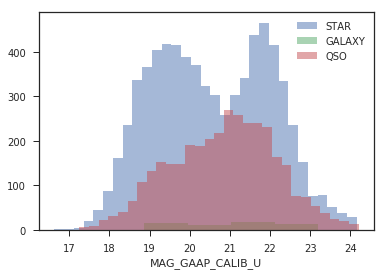

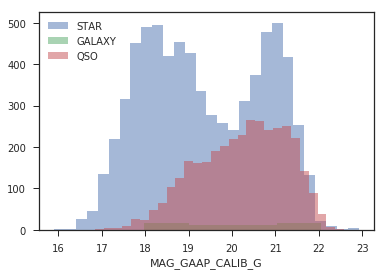

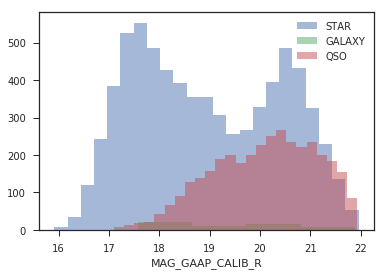

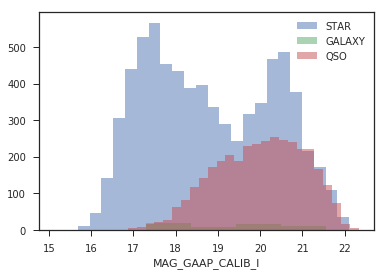

In [14]:
plot_class_histograms(kids_star_x_sdss, BAND_CALIB_COLUMNS)

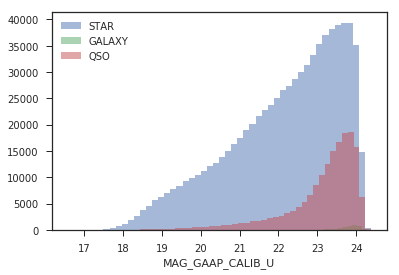

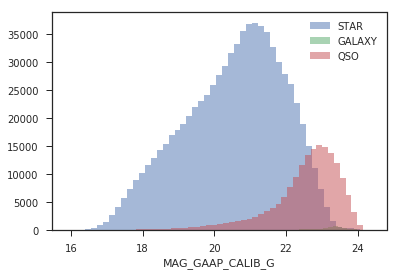

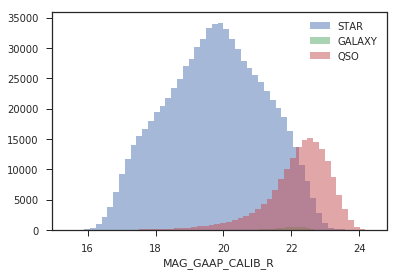

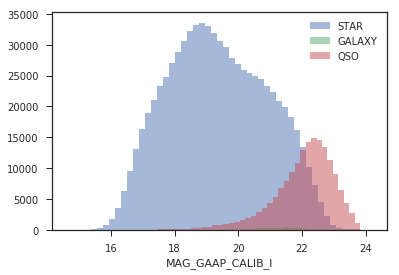

In [15]:
plot_class_histograms(kids_star_catalog, BAND_CALIB_COLUMNS)

## Paired bands

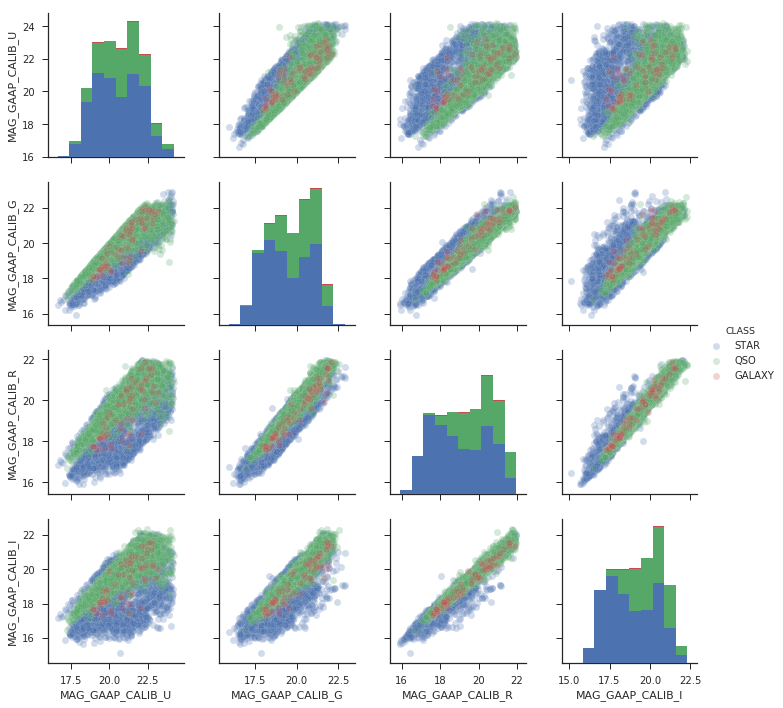

In [16]:
sns.pairplot(kids_star_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

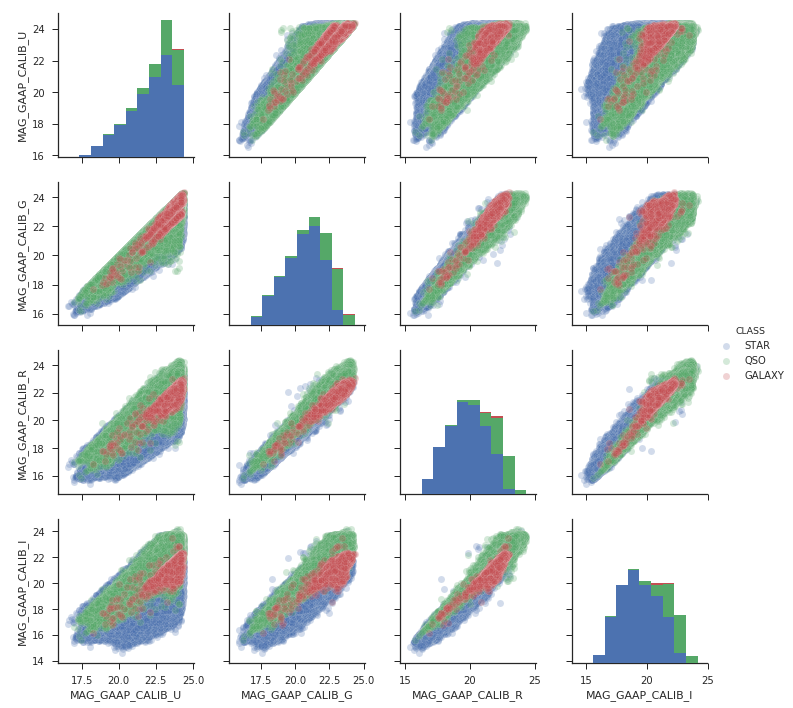

In [17]:
sns.pairplot(kids_star_catalog[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

## Standalone colors

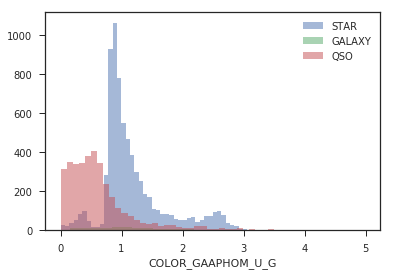

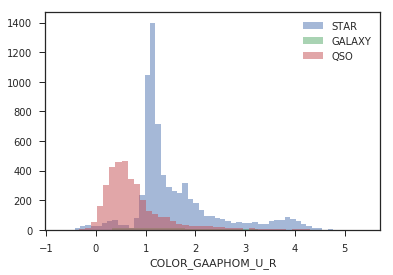

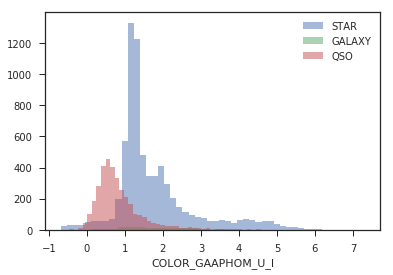

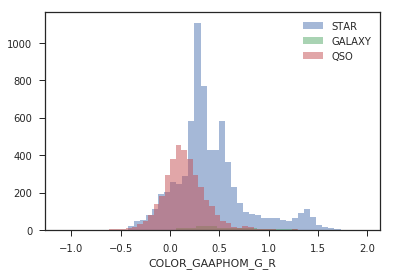

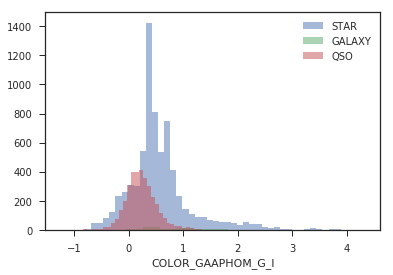

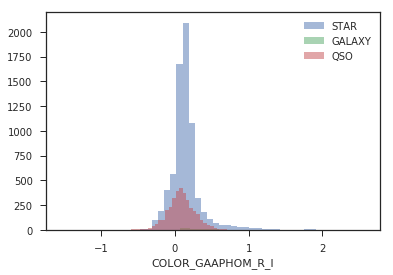

In [18]:
plot_class_histograms(kids_star_x_sdss, COLOR_COLUMNS)

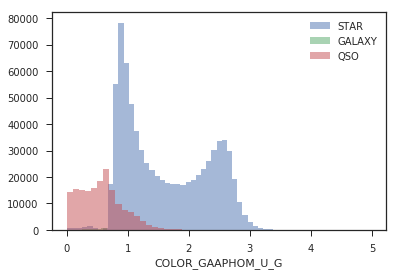

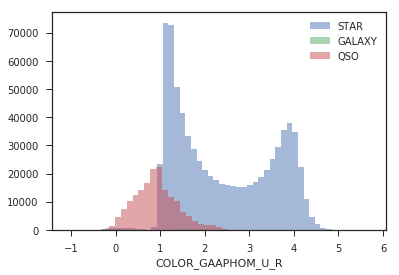

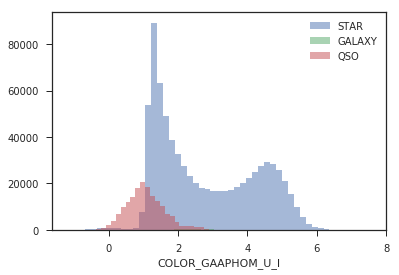

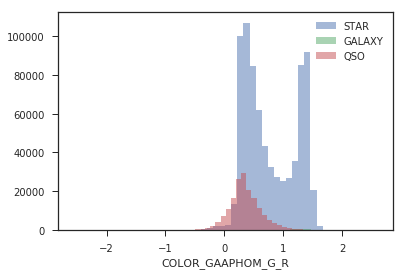

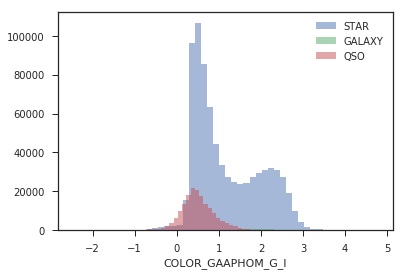

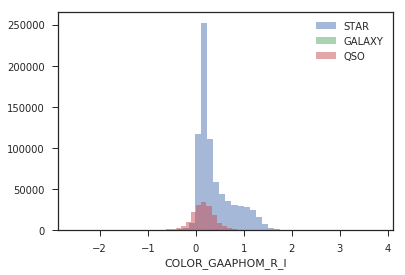

In [19]:
plot_class_histograms(kids_star_catalog, COLOR_COLUMNS)

## Paired colors

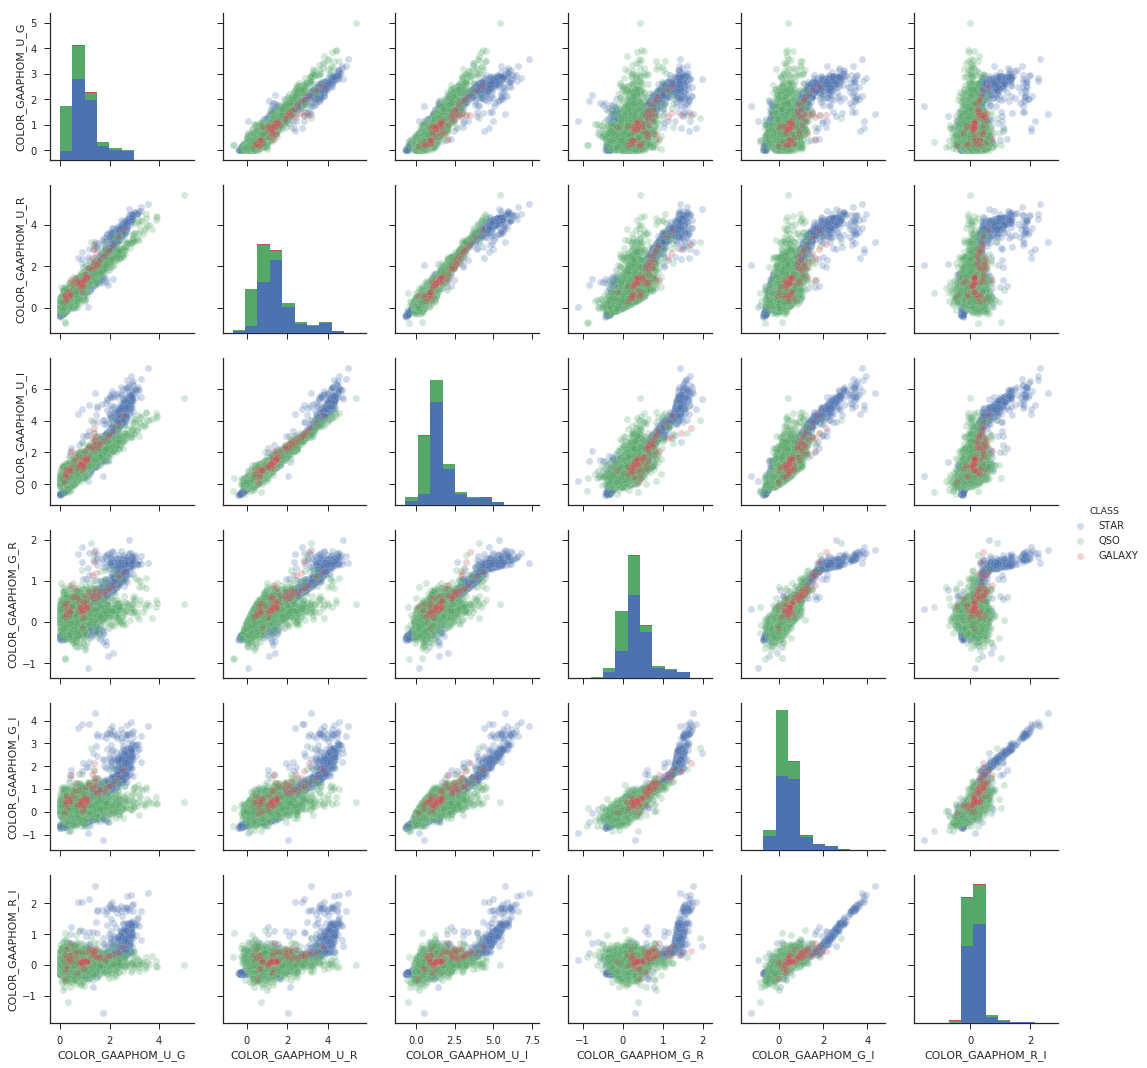

In [20]:
sns.pairplot(kids_star_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

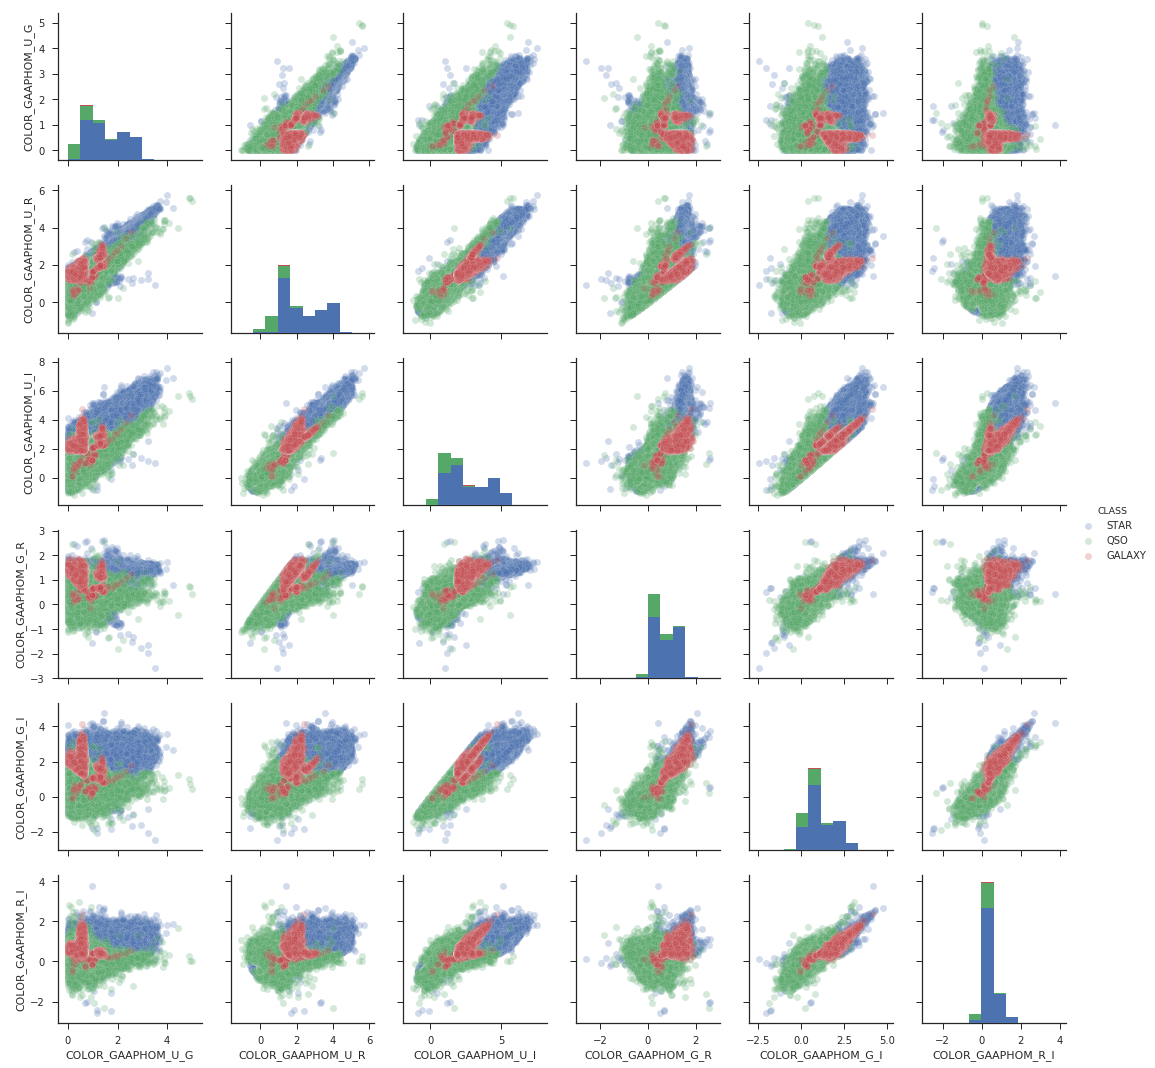

In [21]:
sns.pairplot(kids_star_catalog[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

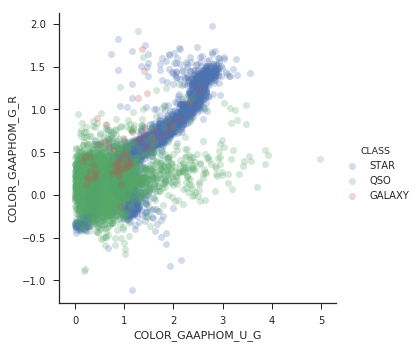

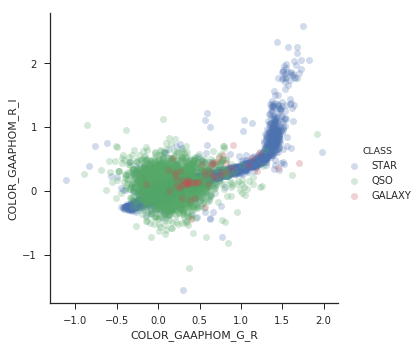

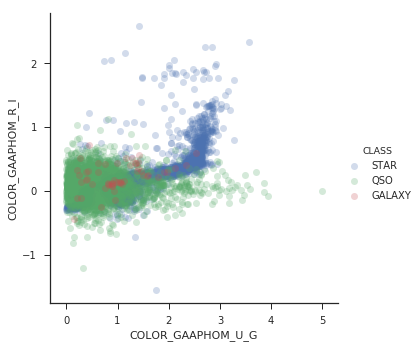

In [22]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_star_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

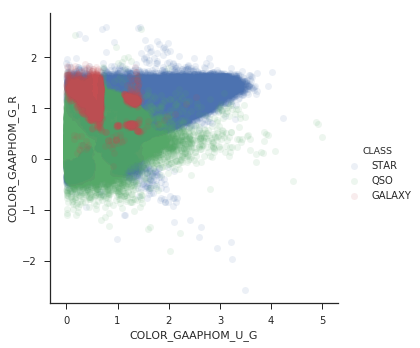

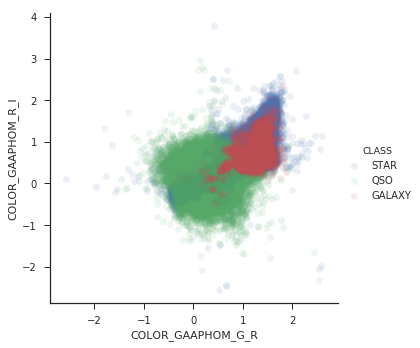

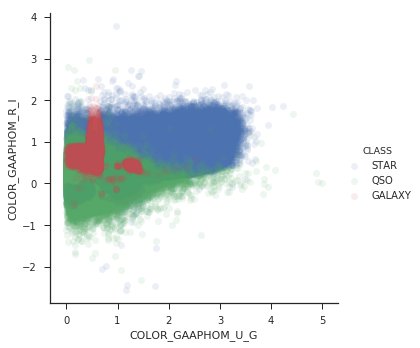

In [23]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_star_catalog, fit_reg=False, scatter_kws={'alpha': 0.1})

## QSO color pairs

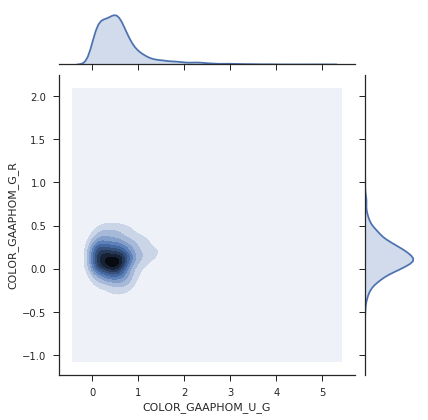

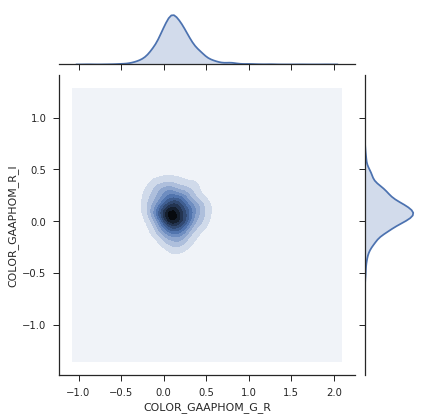

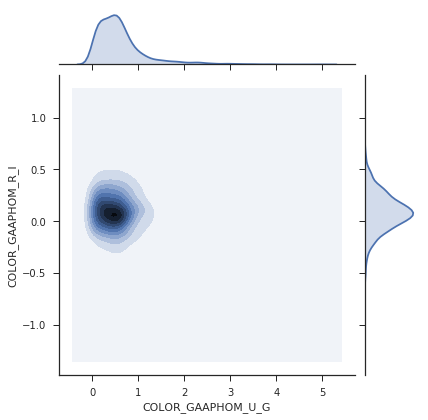

In [24]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_star_sdss[b_1], qso_kids_star_sdss[b_2], kind='kde', stat_func=None)

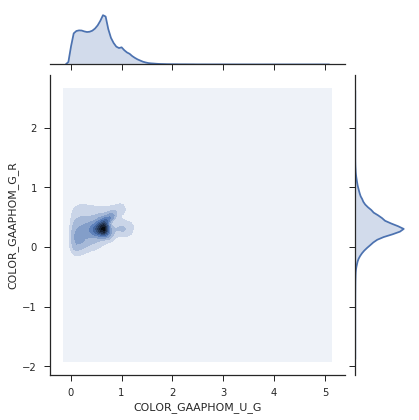

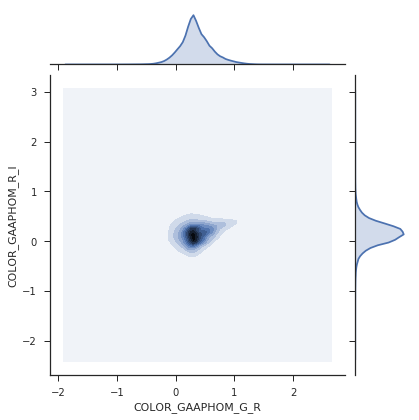

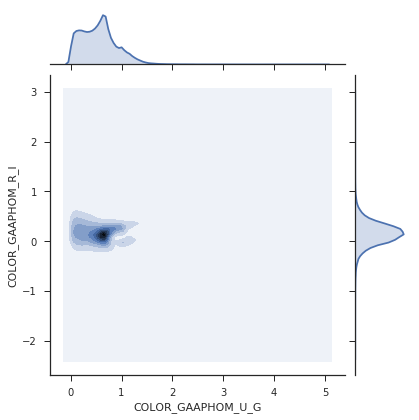

In [25]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_star_catalog[b_1], qso_kids_star_catalog[b_2], kind='kde', stat_func=None)

# Number counts analysis

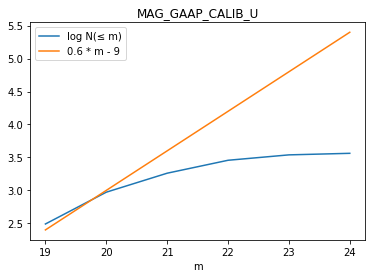

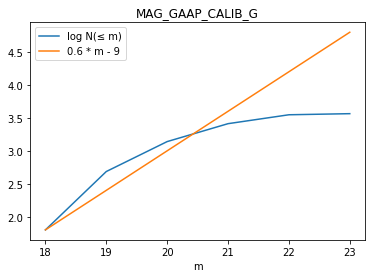

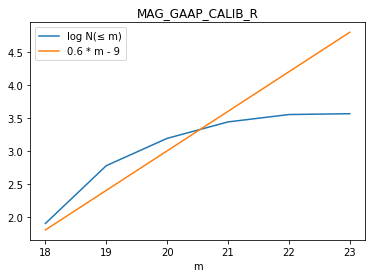

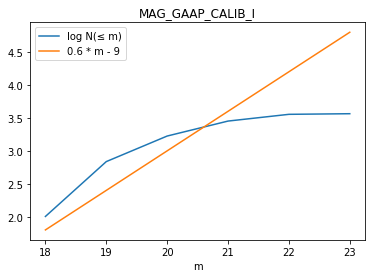

In [9]:
number_count_analysis(qso_kids_star_sdss, c=9)

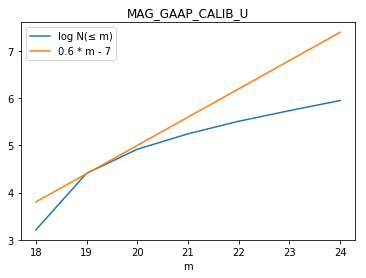

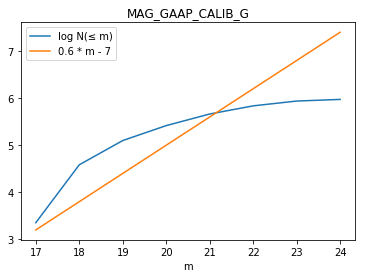

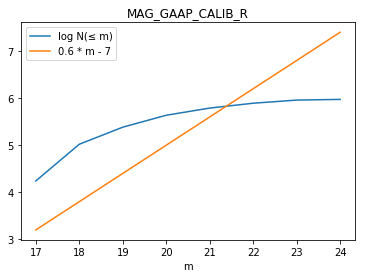

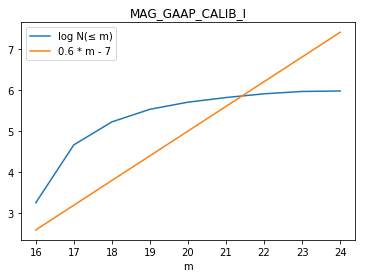

In [16]:
number_count_analysis(kids_star_catalog, c=7)

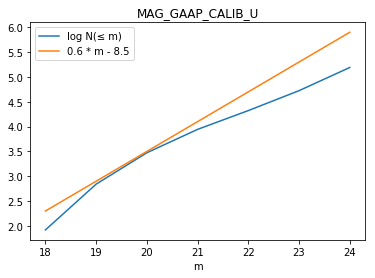

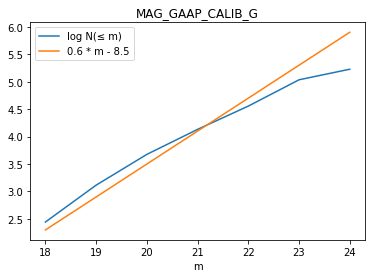

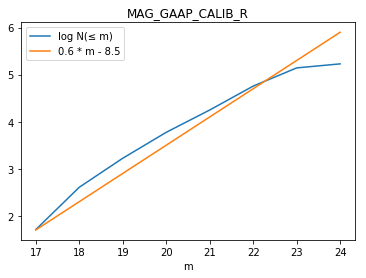

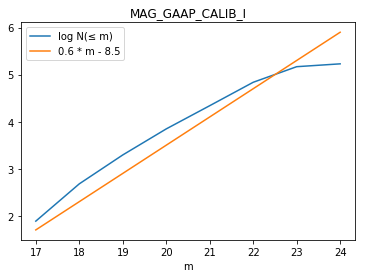

In [11]:
number_count_analysis(qso_kids_star_catalog, c=8.5)